## Importing libraries

In [1]:
import os
import re
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
# from entropy import spectral_entropy
from keras import layers
from keras import models
from keras import utils as np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import itertools
from keras.applications import MobileNet
from keras.layers import GlobalAveragePooling1D, Dense, BatchNormalization, Flatten
from keras.models import Model
!pip install opensmile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.2/149.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.1 MB/s eta 0:00:00
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168840 sha256=5fb6259b3be0fcf4eadf812349d1c27a43437f47feb363ba18b6ef3667e87027
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639
  Attempting uninstal

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
#Unzip the file contents
# !unzip '/content/drive/MyDrive/Colab Notebooks/Dataset/SAVEE.zip' -d SAVEE
# !unzip "/content/drive/MyDrive/Colab Notebooks/Dataset/Crema.zip" -d Crema
# !unzip "/content/drive/MyDrive/Colab Notebooks/Dataset/speech-emotion-recognition-ravdess-data.zip" -d RAVDESS
# !unzip "/content/drive/MyDrive/Colab Notebooks/Dataset/Tess.zip" -d Tess


Mounted at /content/drive/


In [3]:
train_extracted_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Opensmile_AllData_FourEmotions_Train.csv')
train_extracted_df.sample(frac=1)
X = train_extracted_df.drop(labels="labels", axis=1)
Y = train_extracted_df["labels"]

In [4]:
X_train=train_extracted_df.drop(labels="labels", axis=1)
lb = LabelEncoder()
Y = np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y
y_train=Y
X_train.shape, y_train.shape

['angry' 'happy' 'neutral' 'sad']


((5800, 6373), (5800, 4))

In [5]:
test_extracted_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Opensmile_AllData_FourEmotions_Test.csv')
test_extracted_df.sample(frac=1)
X_test= test_extracted_df.drop(labels="labels", axis=1)
y = test_extracted_df["labels"]
y = np_utils.to_categorical(lb.fit_transform(y))
print(lb.classes_)
y_test= y
X_test.shape, y_test.shape

['angry' 'happy' 'neutral' 'sad']


((1281, 6373), (1281, 4))

In [6]:
# Standardize data
scaler = StandardScaler()
gen = scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5800, 6373), (1281, 6373), (5800, 4), (1281, 4))

In [7]:
import joblib
joblib.dump(gen,'std.pkl')

['std.pkl']

In [8]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.88676393, -0.49235525, -0.32908845, ...,  0.27006331,
         0.3909999 , -0.65005748],
       [ 0.54945752, -0.49235525, -0.27146149, ..., -0.95632411,
        -0.9471821 , -0.93671365],
       [-0.14111333, -0.56841744,  0.58141976, ..., -0.73086543,
         0.34744815, -0.03682714],
       ...,
       [ 2.95723072, -0.62546416,  0.80040282, ...,  1.80224918,
         0.64530807,  0.84760125],
       [ 1.45353328,  1.92261977,  1.61870773, ...,  0.12676446,
        -0.39150501, -0.36002586],
       [ 0.33296478, -0.94872849, -0.17925827, ..., -0.45776308,
         0.6836656 ,  1.31151573]])

In [9]:
joblib.load('std.pkl').transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.47130951, -5.56956943, -4.17861   , ..., -3.76101311,
        -6.7712629 , -4.02001936],
       [-0.7070328 , -5.56956943, -3.9182534 , ..., -3.84723443,
        -6.85950468, -4.04135741],
       [-1.18963149, -6.13654434, -0.06496566, ..., -3.83138353,
        -6.77413477, -3.97437185],
       ...,
       [ 0.97561596, -6.56177607,  0.92439214, ..., -3.6532926 ,
        -6.75449343, -3.90853697],
       [-0.0752283 , 12.43188663,  4.62146515, ..., -3.77108775,
        -6.82286248, -3.99843005],
       [-0.85832663, -8.97141942, -3.50168248, ..., -3.81218303,
        -6.75196407, -3.8740042 ]])

In [10]:
joblib.load('std.pkl').transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ -0.58511982,  -5.71131316,  -1.62710893, ...,  -3.7889581 ,
         -6.80081499,  -3.95882679],
       [ -1.33706865, -10.67234448,  -2.98096602, ...,  -3.81354223,
         -6.83874166,  -4.01218011],
       [ -1.42326144,  -1.4590008 ,   3.94453558, ...,  -3.77773578,
         -6.81498305,  -4.05218648],
       ...,
       [ -1.34596156,  -9.25490688,   0.768177  , ...,  -3.75413697,
         -6.7649021 ,  -3.95254597],
       [ -0.97295014,  -0.75028217,  -1.62710893, ...,  -3.77797319,
         -6.76731394,  -3.94392648],
       [  0.20598581,  14.41629769,   0.45574876, ...,  -3.70208416,
         -6.69899729,  -3.88044794]])

In [11]:
# We have to use 1-dimensional CNN which need specifical shape:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(5800, 6373, 1)

### Let's define our model:

In [ ]:
earlystopping = EarlyStopping(monitor ="val_acc",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [12]:
from tensorflow.keras.regularizers import l2
import keras
# earlystopping = EarlyStopping(monitor="val_acc",
#                               mode='auto', patience=5,
#                               restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

model =  models.Sequential()

model.add(layers.Conv1D(16, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=3, strides=2, padding="same"))
model.add(layers.Dropout(0.3))  # Added dropout layer

model.add(layers.Conv1D(32, kernel_size=3, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=3, strides=2, padding="same"))
model.add(layers.Dropout(0.3))  # Added dropout layer

model.add(layers.Conv1D(64, kernel_size=3, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=3, strides=2, padding="same"))
model.add(layers.Dropout(0.3))  # Added dropout layer


model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4, activation="softmax"))
optimizer = keras.optimizers.Adadelta(learning_rate=0.1)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["acc"])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 6373, 16)          96        
                                                                 
 batch_normalization_8 (Bat  (None, 6373, 16)          64        
 chNormalization)                                                
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 3187, 16)          0         
 g1D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 3187, 16)          0         
                                                                 
 conv1d_7 (Conv1D)           (None, 3187, 32)          1568      
                                                                 
 batch_normalization_9 (Bat  (None, 3187, 32)         

In [13]:
EPOCHS = 100
batch_size = 256

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=batch_size)

Epoch 1/100
23/23 [==============================] - 13s 180ms/step - loss: 1.7891 - acc: 0.4053 - val_loss: 1.2664 - val_acc: 0.5269
Epoch 2/100
23/23 [==============================] - 3s 126ms/step - loss: 1.4268 - acc: 0.5140 - val_loss: 1.3078 - val_acc: 0.4294
Epoch 3/100
23/23 [==============================] - 3s 122ms/step - loss: 1.2829 - acc: 0.5624 - val_loss: 1.3147 - val_acc: 0.4395
Epoch 4/100
23/23 [==============================] - 3s 119ms/step - loss: 1.2373 - acc: 0.5902 - val_loss: 1.3176 - val_acc: 0.4137
Epoch 5/100
23/23 [==============================] - 3s 119ms/step - loss: 1.1420 - acc: 0.6134 - val_loss: 1.3066 - val_acc: 0.4434
Epoch 6/100
23/23 [==============================] - 3s 125ms/step - loss: 1.1126 - acc: 0.6234 - val_loss: 1.2739 - val_acc: 0.4676
Epoch 7/100
23/23 [==============================] - 3s 127ms/step - loss: 1.0930 - acc: 0.6390 - val_loss: 1.2418 - val_acc: 0.4801
Epoch 8/100
23/23 [==============================] - 3s 128ms/step -

In [15]:
train_acc = history.history['acc']
print("Training Accuracy:", train_acc[-1] * 100, "%")


Training Accuracy: 89.62069153785706 %


41/41 [==============================] - 0s 6ms/step - loss: 0.8156 - acc: 0.7619
Accuracy of our model on test data :  76.1904776096344 %


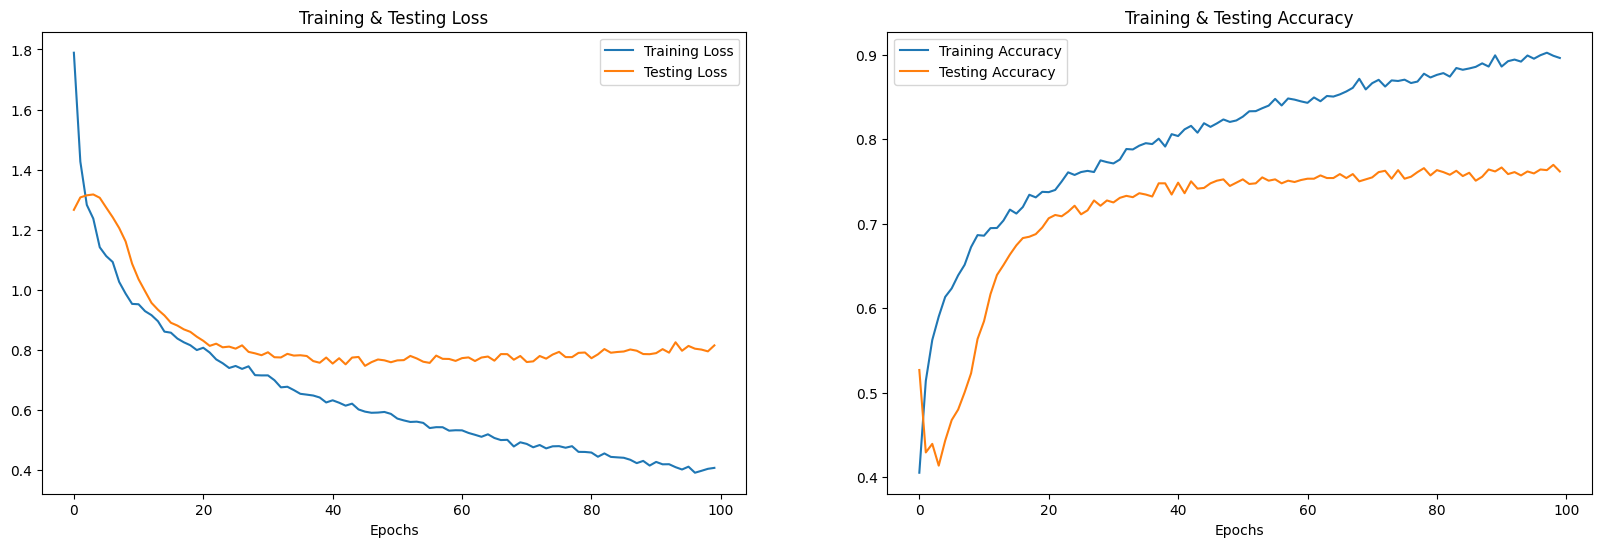

In [16]:

print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")



fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


In [17]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

41/41 [==============================] - 0s 5ms/step


array([1, 2, 1, ..., 0, 0, 0])

In [18]:
y_check = np.argmax(y_test, axis=1)
y_check

array([1, 1, 1, ..., 0, 0, 0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_check, y_pred=y_pred)

In [20]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[261  33  13   6]
 [ 58 173  46   7]
 [  9  18 274  21]
 [  9  11  74 268]]


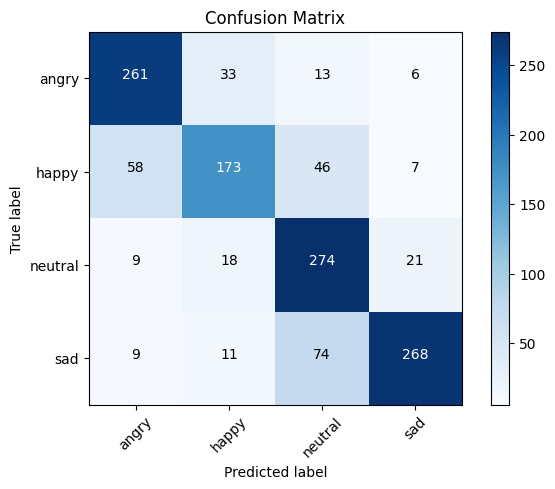

In [21]:
cm_plot_labels = lb.classes_
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
path_to_model = "./res2_model.h5"

model.save(path_to_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
path_to_model = "/content/drive/My Drive/Colab Notebooks/res2_model.h5"

model.save(path_to_model)